In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse,accuracy_score as ac
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report
from sklearn import svm

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:

data = pd.read_csv('cardio_dataset.csv')
print(data)

          id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   72       2     168    62.0    110     80            1     1   
1          1   67       1     156    85.0    140     90            3     1   
2          2   71       1     165    64.0    130     70            3     1   
3          3   74       2     169    82.0    150    100            1     1   
4          4   75       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  69995   70       2     168    76.0    120     80            1     1   
69996  69996   61       1     158   126.0    140     90            2     2   
69997  69997   70       2     183   105.0    180     90            3     1   
69998  69998   61       1     163    72.0    135     80            1     2   
69999  69999   66       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1

In [ ]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,72,2,168,62.0,110,80,1,1,0,0,1,0
1,1,67,1,156,85.0,140,90,3,1,0,0,1,1
2,2,71,1,165,64.0,130,70,3,1,0,0,0,1
3,3,74,2,169,82.0,150,100,1,1,0,0,1,1
4,4,75,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
data.isna().sum().sum()

0

In [ ]:
print('LOGISTIC REGRESSION')

LOGISTIC REGRESSION


In [ ]:
data.shape

(70000, 13)

In [ ]:
data['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [ ]:
X=data.drop(columns='cardio')
y=data['cardio']

In [ ]:
X.shape,y.shape

((70000, 12), (70000,))

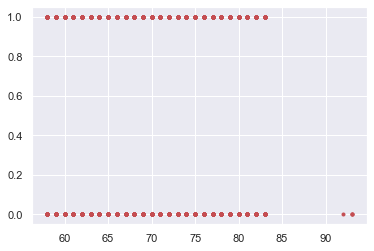

In [ ]:
plt.scatter(X.iloc[:,1:2],y,marker=".", color="r")

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20,stratify=y)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((56000, 12), (14000, 12), (56000,), (14000,))

In [ ]:
lreg=LogisticRegression()
lreg.fit(X_train,y_train)
lreg.predict(X_test)
y_train_pred=lreg.predict(X_train)
y_test_pred=lreg.predict(X_test)

In [ ]:
print("Accuracy scores of Training dataset : {}" ,format(lreg.score(X_train,y_train)))
print("Accuracy scores of Testing dataset : {}" ,format(lreg.score(X_test,y_test)))

Accuracy scores of Training dataset : {} 0.7093928571428572
Accuracy scores of Testing dataset : {} 0.7023571428571429


In [ ]:
from sklearn.metrics import confusion_matrix
matrix =confusion_matrix(y_test,y_test_pred)
matrix

array([[5116, 1888],
       [2279, 4717]], dtype=int64)

Text(30.5, 0.5, 'Truth')

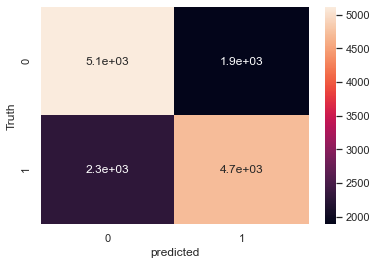

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(matrix,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,precision_score,f1_score,recall_score

In [ ]:
accuracy=accuracy_score(y_test,y_test_pred)
#recall=recall_score(y_test,y_test_pred, average="binary", pos_label="Mine")
#precision=precision_score(y_test,y_test_pred, average="binary", pos_label="Mine")
#f1=f1_score(y_test,y_test_pred, average="binary", pos_label="Mine")

In [ ]:
#pd.DataFrame({'Logistic Regression Metrics': [accuracy, recall, precision,f1]}, index=['accuracy', 'recall', 'precision','f1'])
pd.DataFrame({'Logistic Regression Metrics': [accuracy]}, index=['accuracy'])

,Logistic Regression Metrics
accuracy,0.702357


In [ ]:
print('KNN CLASSIFIER')

KNN CLASSIFIER


In [ ]:
X = data.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12]].values
y = data.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
#pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred})

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,precision_score,f1_score,recall_score

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
#recall=recall_score(y_test,y_pred, average="binary", pos_label="Mine")
#precision=precision_score(y_test,y_pred, average="binary", pos_label="Mine")
#f1=f1_score(y_test,y_pred, average="binary", pos_label="Mine")

In [ ]:
#pd.DataFrame({'KNN Metrics': [accuracy, recall, precision,f1]}, index=['accuracy', 'recall', 'precision','f1'])
pd.DataFrame({'KNN Metrics': [accuracy]}, index=['accuracy'])

,KNN Metrics
accuracy,0.998905


In [ ]:
from sklearn.metrics import confusion_matrix
matrix =confusion_matrix(y_test,y_pred)
matrix

array([[10519,    20],
       [    3, 10458]], dtype=int64)

Text(30.5, 0.5, 'Truth')

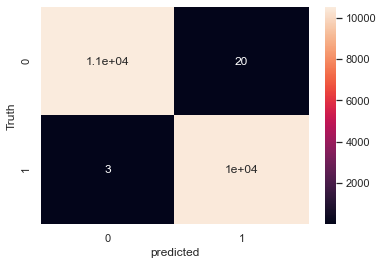

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(matrix,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
print('SVM')

SVM


In [ ]:
from sklearn import svm

In [ ]:
# Defining the Features and Labels

# Defining X (featues of the data)
X = data.drop(columns='cardio', axis=1)

# Defining y (Labels )
y = data['cardio'] # defining y

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Fit to data, then transform it
X = scaler.fit_transform(X)

# test_size represents the proportion of the dataset to include in the test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Print the shapes of the X, X_train and X_test
print("X shape is :", X.shape)
print("X_train shape is:",  X_train.shape)
print("X_test shape is:", X_test.shape)

X shape is : (70000, 12)
X_train shape is: (46900, 12)
X_test shape is: (23100, 12)


In [ ]:
model = svm.SVC(decision_function_shape='ovr')
model.fit(X_train, y_train)

SVC()

In [ ]:
y_train_predict=model.predict(X_train)
y_test_predict=model.predict(X_test)
print("Accuracy_Score :",accuracy_score(y_train,y_train_predict))
print("Confusion_Matrix\n")
print(confusion_matrix(y_test,y_test_predict))

Accuracy_Score : 0.7319616204690832
Confusion_Matrix

[[8756 2750]
 [3509 8085]]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,precision_score,f1_score,recall_score

In [ ]:
accuracy=accuracy_score(y_test,y_test_predict)
#recall=recall_score(y_test,y_test_predict, average="binary", pos_label="Mine")
#precision=precision_score(y_test,y_test_predict, average="binary", pos_label="Mine")
#f1=f1_score(y_test,y_test_predict, average="binary", pos_label="Mine")

In [ ]:
#pd.DataFrame({'SVM Metrics': [accuracy, recall, precision,f1]}, index=['accuracy', 'recall', 'precision','f1'])
pd.DataFrame({'SVM Metrics': [accuracy]}, index=['accuracy'])

,SVM Metrics
accuracy,0.729048


Text(30.5, 0.5, 'Truth')

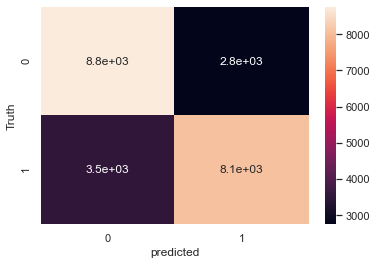

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(confusion_matrix(y_test,y_test_predict),annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
print("Random forest Algorithm")

Random forest Algorithm


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7185714285714285

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test,y_predicted)
print(cm)

[[8558 2948]
 [3553 8041]]


In [ ]:
accuracy=accuracy_score(y_test,y_predicted)
#recall=recall_score(y_test,y_predicted, average="binary", pos_label="Mine")
#precision=precision_score(y_test,y_predicted, average="binary", pos_label="Mine")
#f1=f1_score(y_test,y_predicted, average="binary", pos_label="Mine")


In [ ]:
#pd.DataFrame({'Random Forest Metrics': [accuracy, recall, precision,f1]}, index=['accuracy', 'recall', 'precision','f1'])
pd.DataFrame({'Random forest Metrics': [accuracy]}, index=['accuracy'])

,Random forest Metrics
accuracy,0.718571


Text(30.5, 0.5, 'Truth')

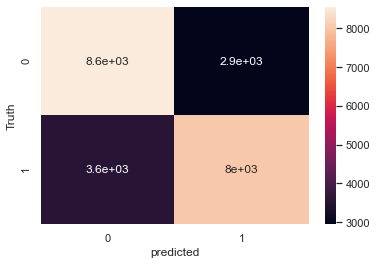

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
print("neural networks")

neural networks


In [ ]:
from __future__ import absolute_import, division, print_function  # Python 2/3 compatibility

import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline
import keras
print(keras.__version__)

2.10.0


In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [ ]:
X = data.iloc[:, :-1].values
y = data["cardio"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

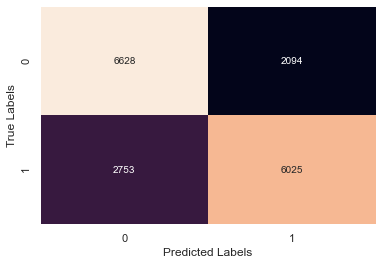

0.7230285714285715
Precision: {Accuracy: {ac_score:.2f}


In [ ]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[
#     ('LR', LogisticRegression(max_iter=500, C=100)),
    ('SVC', SVC(C=10, kernel='rbf', gamma='scale', probability=True)),
    ('RF', RandomForestClassifier(n_estimators=350, n_jobs=4))
], voting='soft')

vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_mat, annot=True, fmt=".0f", cbar=False)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()

ac_score=accuracy_score(y_test,y_pred)
#rc_score=recall_score(y_test,y_pred, average="binary", pos_label="Mine")
#pr_score=precision_score(y_test,y_pred, average="binary", pos_label="Mine")

#print(f'Precision: {pr_score:.2f}, Recall: {rc_score:.2f}, Accuracy: {ac_score:.2f}')
print(ac_score)
print('Precision: {Accuracy: {ac_score:.2f}')

In [ ]:
print('Draw the plot for accuracy comparison for all algorithms')

Draw the plot for accuracy comparison for all algorithms


In [ ]:
#Importing classifiers
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# For feature creation
poly = PolynomialFeatures(2)

In [ ]:
classifiers_ = [
    ("Decision Tree", DecisionTreeClassifier(max_depth=10)),
    ("Linear SVM", SVC (C=1.0,kernel="linear",probability=True)),
    ("Naive Bayes",GaussianNB()),
    ("Logistic Regression",LogisticRegression()),
    ("Nearest Neighbors",KNeighborsClassifier(3)),
    ("Neural Net",MLPClassifier(alpha=1)),
    ("Random Forest",RandomForestClassifier(n_jobs=2, random_state=1)),
    ("RBF SVM",SVC(gamma=2, C=1,probability=True))
    ]

In [ ]:
clf_names = []
train_scores = []
test_scores = []
for n,clf in classifiers_:
    clf_names.append(n)
    # Model declaration with pipeline
    clf = Pipeline([('POLY', poly),('CLF',clf)])

    # Model training
    clf.fit(X_train, y_train)
    print(n+" training done!")

    # Measure training accuracy and score
    train_scores.append(clf.score(X_train, y_train))
    print(n+" training score done!")

    # Measure test accuracy and score
    test_scores.append(clf.score(X_test, y_test))
    print(n+" testing score done!")

    print("---")

Decision Tree training done!
Decision Tree training score done!
Decision Tree testing score done!
---


In [ ]:
#Plot results
plt.title('Accuracy Training Score')
plt.grid()
plt.plot(train_scores,clf_names)
plt.show()

plt.title('Accuraccy Test Score')
plt.grid()
plt.plot(test_scores,clf_names)
plt.show()